# 0. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Khởi tạo dữ liệu

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,49.667211,2.131572,9.288194,23.645953,19.139663
1,52.871920,15.187704,10.628567,-14.260602,23.729249
2,59.931284,10.971713,10.129470,-9.187647,20.984198
3,28.668749,0.555080,8.042255,20.345707,14.873801
4,53.541626,10.729239,9.940689,15.604661,20.930117


# 2. Trực quan hoá dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

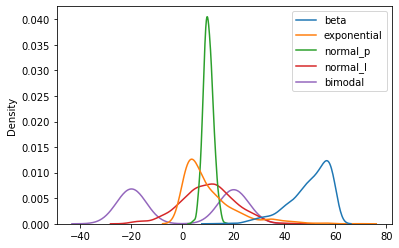

In [5]:
sns.kdeplot(data = df)

# 3. Hiển thị thống kê về dữ liệu sinh ra

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.096325,10.346443,10.110287,10.033052,0.057823
std,8.113574,10.351045,1.950001,10.271474,20.325921
min,13.701401,0.007470,3.667294,-20.496797,-28.036249
25%,45.791806,3.051010,8.821489,3.443540,-20.048054
50%,52.085539,7.012296,10.034936,10.311473,-0.559437
75%,56.560267,14.026268,11.403327,16.759562,20.045668
max,59.998297,68.253747,16.832045,43.807760,28.075899


# 4. Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

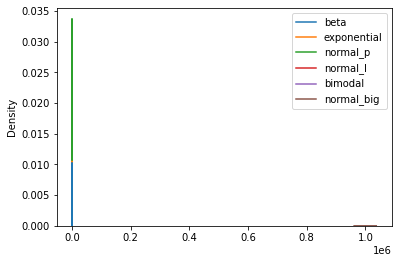

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

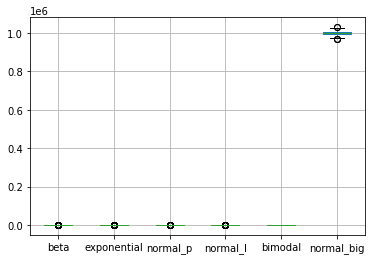

In [8]:
# Trực quan hoá bằng biểu đồ box plot
df.boxplot()

# 5. Chuẩn hoá với StandardScaler (Z-Score scaling)

In [9]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sách cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.052915,-0.794024,-0.421797,1.325974,0.939263,0.445642
1,0.342264,0.467941,0.265918,-2.366341,1.165176,-0.732731
2,1.212768,0.060437,0.009843,-1.872206,1.030056,-0.482726
3,-2.642275,-0.946403,-1.061059,1.004512,0.729285,-0.605990
4,0.424847,0.037000,-0.087017,0.542707,1.027394,0.309915


<AxesSubplot:ylabel='Density'>

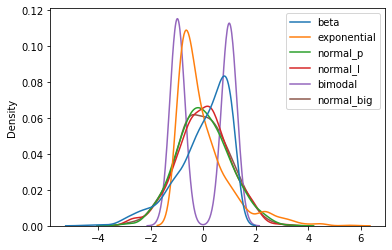

In [12]:
# Biểu diễn dữ liệu sinh ra được chuẩn hoá
sns.kdeplot(data = df_s)

In [13]:
# Thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-8.171241e-17,1.367795e-16,1.012523e-16,4.973799e-17,1.136868e-16,2.504663e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.487928e+00,-9.993336e-01,-3.305750e+00,-2.973782e+00,-1.382871e+00,-3.114930e+00
25%,-5.307984e-01,-7.051543e-01,-6.612522e-01,-6.418562e-01,-9.896692e-01,-6.881881e-01
50%,2.452939e-01,-3.222685e-01,-3.866081e-02,2.711981e-02,-3.038329e-02,-1.730646e-02
75%,7.970812e-01,3.556807e-01,6.634291e-01,6.552006e-01,9.838593e-01,6.875612e-01
max,1.221031e+00,5.597143e+00,3.448778e+00,3.289850e+00,1.379130e+00,2.892076e+00


<AxesSubplot:>

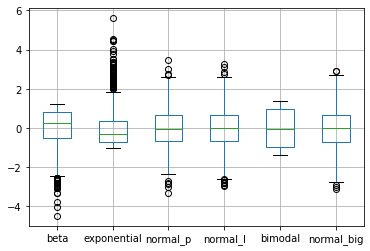

In [14]:
# Trực quan bắng biểu đồ box plot
df_s.boxplot()